In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load image
img = cv.imread('a1images/a1images/einstein.png', 0)  # Load as grayscale
img = img.astype(np.float64)

In [3]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [4]:
# (a) Using filter2D
gx_a = cv.filter2D(img, -1, sobel_x)
gy_a = cv.filter2D(img, -1, sobel_y)
mag_a = np.sqrt(gx_a**2 + gy_a**2)

In [5]:
# (b) Manual convolution
def manual_sobel(img, kernel):
    h, w = img.shape
    padded = np.pad(img, 1, mode='constant')
    result = np.zeros((h, w))
    
    for i in range(h):
        for j in range(w):
            result[i, j] = np.sum(padded[i:i+3, j:j+3] * kernel)
    return result

gx_b = manual_sobel(img, sobel_x)
gy_b = manual_sobel(img, sobel_y)
mag_b = np.sqrt(gx_b**2 + gy_b**2)

In [6]:
# (c) Separable filtering
# Sobel X = [1 2 1]^T * [1 0 -1]
v1 = np.array([[1], [2], [1]])  # vertical
h1 = np.array([[1, 0, -1]])     # horizontal

temp = cv.filter2D(img, -1, v1)
gx_c = cv.filter2D(temp, -1, h1)

# Sobel Y = [1 0 -1]^T * [1 2 1]
v2 = np.array([[1], [0], [-1]])
h2 = np.array([[1, 2, 1]])

temp = cv.filter2D(img, -1, v2)
gy_c = cv.filter2D(temp, -1, h2)
mag_c = np.sqrt(gx_c**2 + gy_c**2)


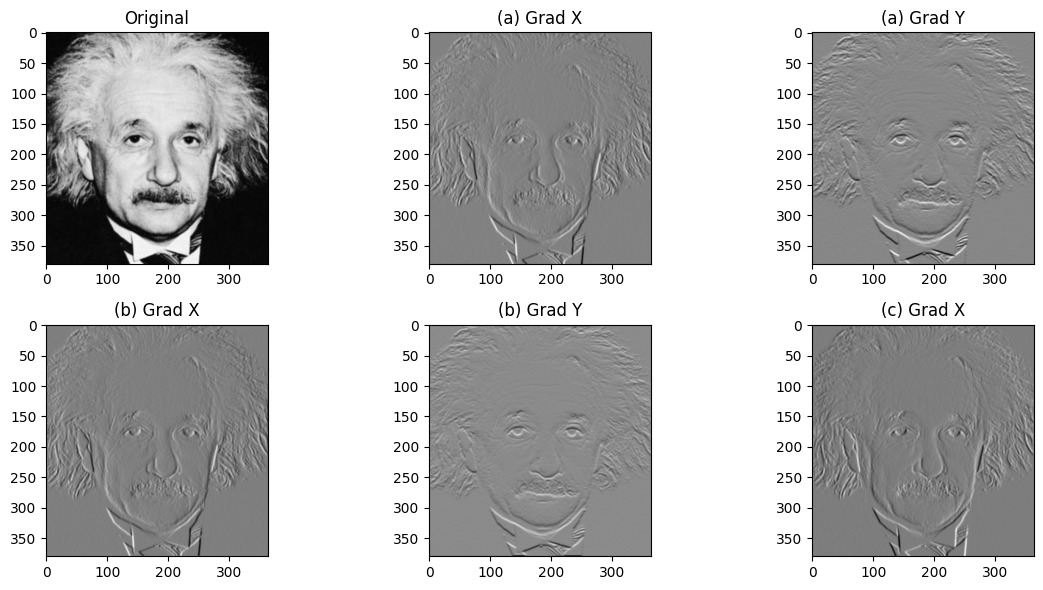

In [10]:
# Display results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(2, 3, 2); plt.imshow(gx_a, cmap='gray'); plt.title('(a) Grad X')
plt.subplot(2, 3, 3); plt.imshow(gy_a, cmap='gray'); plt.title('(a) Grad Y')

plt.subplot(2, 3, 4); plt.imshow(gx_b, cmap='gray'); plt.title('(b) Grad X')
plt.subplot(2, 3, 5); plt.imshow(gy_b, cmap='gray'); plt.title('(b) Grad Y')
plt.subplot(2, 3, 6); plt.imshow(gx_c, cmap='gray'); plt.title('(c) Grad X')

plt.tight_layout()
plt.show()